In [1]:
import pandas as pd, numpy as np, glob, os, math
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"E:\Muthoot POC\Branch Data\State level data.xlsx")
df.head(2)

,Loanno,Client_no,LoanAmount,Loanbalance,Paidupto,Inst_complete,Centr,Group,LOAN_DATE,FIRSTINSTDT,...,LOANTYPE,Loancycle,Disb-mode,Collday,Collcycle,WoffBO,WoffBODt,BRANCH,MMLBRANCH,STATE
0,URPK@61,134@URPK,20000,7231,2017-08-07,8,URPK/Centre-10,URPK/Centre-10/Group-1,2016-12-02,2017-01-02,...,M,MM,D,MON,1,NaN,NaN,URAPAKKAM,KANCHIPURAM MML,TAMILNADU
1,URPK@62,122@URPK,20000,7231,2017-08-07,8,URPK/Centre-10,URPK/Centre-10/Group-1,2016-12-02,2017-01-02,...,M,MM,D,MON,1,NaN,NaN,URAPAKKAM,KANCHIPURAM MML,TAMILNADU


In [3]:
df.shape

(14999, 23)

In [4]:
# df.info()

In [5]:
df1 = df[['Loanno', 'Client_no', 'LoanAmount', 'Loanbalance', 'Paidupto',
       'Inst_complete', 'Centr', 'Group', 'LOAN_DATE', 'FIRSTINSTDT',
       'INTEREST', 'INSTALLMENTS', 'EWIAMT', 'LOANTYPE', 'Loancycle',
       'BRANCH',
       'MMLBRANCH', 'STATE']]

df1.columns

Index(['Loanno', 'Client_no', 'LoanAmount', 'Loanbalance', 'Paidupto',
       'Inst_complete', 'Centr', 'Group', 'LOAN_DATE', 'FIRSTINSTDT',
       'INTEREST', 'INSTALLMENTS', 'EWIAMT', 'LOANTYPE', 'Loancycle', 'BRANCH',
       'MMLBRANCH', 'STATE'],
      dtype='object')

In [6]:
df_loan_wise = df1

In [7]:
df1.describe()

,LoanAmount,Loanbalance,Inst_complete,INTEREST,INSTALLMENTS,EWIAMT
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,23936.309621,15016.753450,8.147610,23.103580,19.879192,1515.782586
std,6210.714975,5605.579629,4.469311,0.373946,5.843249,379.892430
min,2074.000000,11.000000,0.000000,22.800000,8.000000,284.000000
25%,20000.000000,10752.000000,5.000000,22.800000,12.000000,1307.000000
50%,25000.000000,14640.000000,6.000000,22.800000,24.000000,1316.000000
75%,25000.000000,19992.000000,14.000000,23.500000,24.000000,1880.000000
max,45000.000000,31964.000000,25.000000,24.000000,24.000000,2368.000000


In [8]:
df2 = df1[['BRANCH','Loanbalance']].groupby('BRANCH').count()
df2.columns = ['Productivity']

In [9]:
df2

,Productivity
BRANCH,
ALANDURAI,28
ALANGUDI,9
ALANGULAM-OLD BUS STAND,13
ALWARTHIRUNAGARI,13
AMBASAMUDRAM,12
ANANDPUR SAHIB GL,26
ANDHIYUR,51
ANDIMADAM,40
ANKLESHWAR,498


In [10]:
df3 = df1[['BRANCH','LoanAmount']].groupby('BRANCH').sum()
df2['Agg'] = df3['LoanAmount']
df2['Average Ticket Size'] = df2['Agg']/df2['Productivity']
df2.drop('Agg',axis=1,inplace=True)

In [11]:
df2.head(2)

,Productivity,Average Ticket Size
BRANCH,,
ALANDURAI,28,26250.000000
ALANGUDI,9,28888.888889


In [12]:
df1['a'] = df1['Inst_complete']-(df1['LoanAmount']-df1['Loanbalance'])/(df1['EWIAMT'])
df1['b'] = df1['a']*30
df5 = df1[['STATE','BRANCH','b']].groupby('BRANCH').mean()
df5.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,b
BRANCH,
ALANDURAI,128.497979
ALANGUDI,121.583465


In [13]:
# df2['Average DPD'] = df5['b']
# df2.head(2)

In [14]:
df6 = df1.groupby(['STATE','BRANCH']).agg(lambda x: x.value_counts().index[0])
df6.head(2)

Loanno  Client_no  LoanAmount  Loanbalance   Paidupto  \
STATE   BRANCH                                                                
GUJARAT ANKLESHWAR  AKWR@481  1746@AKWR       20000        12337 2018-03-05   
        BHAVNAGAR   BVNG@115    90@BVNG       20000        12322 2018-03-12   

                    Inst_complete           Centr                   Group  \
STATE   BRANCH                                                              
GUJARAT ANKLESHWAR              5  AKWR/Centre-45  AKWR/Centre-47/Group-1   
        BHAVNAGAR               5   BVNG/Centre-2  BVNG/Centre-11/Group-1   

                    LOAN_DATE FIRSTINSTDT  INTEREST  INSTALLMENTS  EWIAMT  \
STATE   BRANCH                                                              
GUJARAT ANKLESHWAR 2017-10-15  2017-11-06      22.8            12    1880   
        BHAVNAGAR  2017-10-05  2017-11-13      22.8            12    1880   

                   LOANTYPE Loancycle       MMLBRANCH         a          b  
STATE   BRANCH                                                              
GUJARAT ANKLESHWAR        M        MM  ANKLESHWAR MML  0.923936  27.718085  
        BHAVNAGAR         M        MM   BHAVNAGAR MML  0.915957  27.478723

In [15]:
df6.to_csv(r"E:\Muthoot POC\Branch Data\aa.csv")
df7 = pd.read_csv(r"E:\Muthoot POC\Branch Data\aa.csv")

In [16]:
df8 = df7[["STATE","BRANCH"]]
df9 = pd.merge(df2, df8, on=['BRANCH'])

In [17]:
df9.to_csv(r"E:\Muthoot POC\Branch Data\Aggregated_Data.csv")
df9.head(2)

,BRANCH,Productivity,Average Ticket Size,STATE
0,ALANDURAI,28,26250.000000,TAMILNADU
1,ALANGUDI,9,28888.888889,TAMILNADU


In [18]:
df9['Total Loan Amount'] = df9['Average Ticket Size']*df9['Productivity']
df9.head(2)

,BRANCH,Productivity,Average Ticket Size,STATE,Total Loan Amount
0,ALANDURAI,28,26250.000000,TAMILNADU,735000.0
1,ALANGUDI,9,28888.888889,TAMILNADU,260000.0


In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df9.describe()

,Productivity,Average Ticket Size,Total Loan Amount
count,238.000,238.000,238.000
mean,63.021,27681.116,1508490.370
std,179.353,5077.148,4188575.940
min,1.000,15000.000,15000.000
25%,7.000,25000.000,190000.000
50%,16.000,27848.613,442500.000
75%,41.000,30350.962,1166250.000
max,1392.000,41551.724,34800000.000


In [20]:
df1['May'] = pd.Timestamp('2018-05-31 00:00:00')
df1['May'].head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   2018-05-31
1   2018-05-31
Name: May, dtype: datetime64[ns]

In [21]:
df1['Paidupto_Month_Year'] = df1['Paidupto'].dt.to_period('M')
df1['DPD 1'] = df1['May'] - df1['Paidupto']
df1['DPD 1'].head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   297 days
1   297 days
Name: DPD 1, dtype: timedelta64[ns]

In [22]:
df1['DPD 1'] = df1['DPD 1'].astype(str)
df1['DPD 2'] = df1['DPD 1'].str.extract(r'(^[-0-9]{,8})')
df1['DPD 2'] = df1['DPD 2'].astype(int)

In [23]:
df11 = df1[['BRANCH','DPD 2']].groupby('BRANCH').mean()
df11.head(2)

,DPD 2
BRANCH,
ALANDURAI,79.893
ALANGUDI,93.778


In [24]:
df12 = pd.merge(df9, df11, on=['BRANCH'])

In [25]:
df12.describe()

,Productivity,Average Ticket Size,Total Loan Amount,DPD 2
count,238.000,238.000,238.000,238.000
mean,63.021,27681.116,1508490.370,94.135
std,179.353,5077.148,4188575.940,49.538
min,1.000,15000.000,15000.000,15.000
25%,7.000,25000.000,190000.000,75.167
50%,16.000,27848.613,442500.000,80.083
75%,41.000,30350.962,1166250.000,88.329
max,1392.000,41551.724,34800000.000,415.000


In [26]:
df12['State Type'] = np.where(df12['Total Loan Amount'] > df12['Total Loan Amount'].quantile(q=0.66), 'Matured', 
         (np.where(df12['Total Loan Amount'] < df12['Total Loan Amount'].quantile(q=0.33), 'New', 'Growing')))

df12.head(8)

,BRANCH,Productivity,Average Ticket Size,STATE,Total Loan Amount,DPD 2,State Type
0,ALANDURAI,28,26250.000,TAMILNADU,735000.000,79.893,Growing
1,ALANGUDI,9,28888.889,TAMILNADU,260000.000,93.778,Growing
2,ALANGULAM-OLD BUS STAND,13,28076.923,TAMILNADU,365000.000,61.846,Growing
3,ALWARTHIRUNAGARI,13,20000.000,TAMILNADU,260000.000,152.923,Growing
4,AMBASAMUDRAM,12,30000.000,TAMILNADU,360000.000,80.167,Growing
5,ANANDPUR SAHIB GL,26,25000.000,PUNJAB,650000.000,80.769,Growing
6,ANDHIYUR,51,30490.196,TAMILNADU,1555000.000,83.784,Matured
7,ANDIMADAM,40,33375.000,TAMILNADU,1335000.000,81.025,Matured


In [27]:
df12['Total Loan Amount'].quantile(q=0.66)

771300.0000000002

In [28]:
df12['DPD Class'] = np.where(df12['DPD 2']>90,1,0)

In [29]:
df_branch_wise = df12
df12.to_csv(r"E:\Muthoot POC\Branch Data\Final.csv")
df_branch_wise.head()

,BRANCH,Productivity,Average Ticket Size,STATE,Total Loan Amount,DPD 2,State Type,DPD Class
0,ALANDURAI,28,26250.000,TAMILNADU,735000.000,79.893,Growing,0
1,ALANGUDI,9,28888.889,TAMILNADU,260000.000,93.778,Growing,1
2,ALANGULAM-OLD BUS STAND,13,28076.923,TAMILNADU,365000.000,61.846,Growing,0
3,ALWARTHIRUNAGARI,13,20000.000,TAMILNADU,260000.000,152.923,Growing,1
4,AMBASAMUDRAM,12,30000.000,TAMILNADU,360000.000,80.167,Growing,0


# Branch-Wise Histograms - Productivity, Average Ticket Size, Total Loan Amount and Average DPD

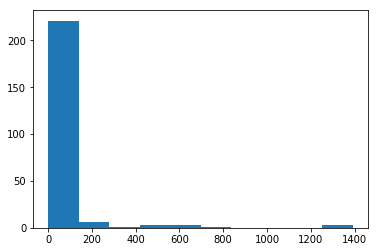

In [30]:
# Productivity per branch

plt.hist(df_branch_wise['Productivity'])
plt.show()

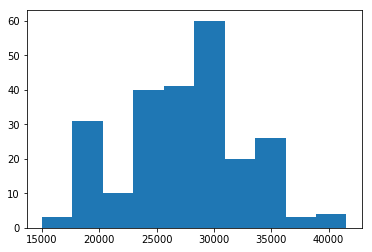

In [31]:
# Average ticket size per branch

plt.hist(df_branch_wise['Average Ticket Size'])
plt.show()

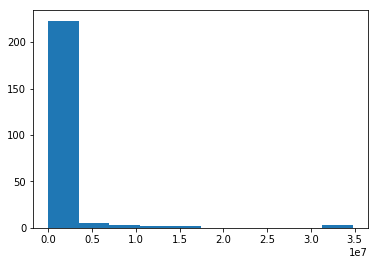

In [32]:
# Total loan amount per branch

plt.hist(df_branch_wise['Total Loan Amount'])

plt.show()

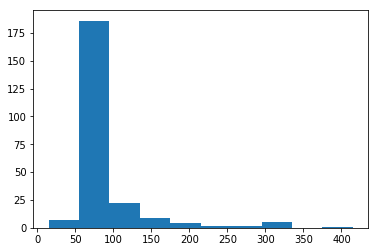

In [33]:
# Average DPD Class per branch

plt.hist(df_branch_wise['DPD 2'])
plt.show()

# Loan-Wise Histograms - Productivity, Average Ticket Size, Total Loan Amount and Average DPD

In [34]:
# Productivity = All loans are active, so the graph would be a rectangle

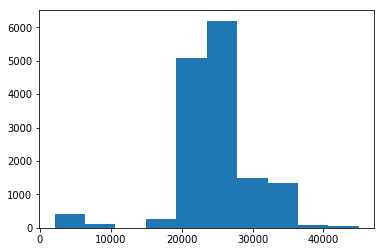

In [35]:
# Loan Amount per loan

plt.hist(df_loan_wise['LoanAmount'])
plt.show()

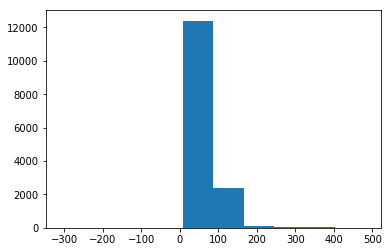

In [36]:
# DPD per loan 

plt.hist(df_loan_wise['DPD 2'])
plt.show()

# Loan Wise Data

In [37]:
df_loan_wise['DPD Class'] = np.where(df_loan_wise['DPD 2'] > 90, 1, 0)
df_loan_wise.head(2)

,Loanno,Client_no,LoanAmount,Loanbalance,Paidupto,Inst_complete,Centr,Group,LOAN_DATE,FIRSTINSTDT,...,BRANCH,MMLBRANCH,STATE,a,b,May,Paidupto_Month_Year,DPD 1,DPD 2,DPD Class
0,URPK@61,134@URPK,20000,7231,2017-08-07,8,URPK/Centre-10,URPK/Centre-10/Group-1,2016-12-02,2017-01-02,...,URAPAKKAM,KANCHIPURAM MML,TAMILNADU,1.233,36.995,2018-05-31,2017-08,297 days 00:00:00.000000000,297,1
1,URPK@62,122@URPK,20000,7231,2017-08-07,8,URPK/Centre-10,URPK/Centre-10/Group-1,2016-12-02,2017-01-02,...,URAPAKKAM,KANCHIPURAM MML,TAMILNADU,1.233,36.995,2018-05-31,2017-08,297 days 00:00:00.000000000,297,1


In [38]:
df55 = df1[['BRANCH','DPD Class']].groupby('BRANCH').sum()

In [39]:
df55.head()

,DPD Class
BRANCH,
ALANDURAI,0
ALANGUDI,1
ALANGULAM-OLD BUS STAND,0
ALWARTHIRUNAGARI,4
AMBASAMUDRAM,0


In [40]:
df55['DPD Counts'] = df55['DPD Class'].apply(lambda x: int(x))

In [41]:
df55.to_csv(r'E:\Muthoot POC\Branch Data\bb.csv')
df56 = pd.read_csv(r'E:\Muthoot POC\Branch Data\bb.csv')

In [42]:
df_branch_wise.head()

,BRANCH,Productivity,Average Ticket Size,STATE,Total Loan Amount,DPD 2,State Type,DPD Class
0,ALANDURAI,28,26250.000,TAMILNADU,735000.000,79.893,Growing,0
1,ALANGUDI,9,28888.889,TAMILNADU,260000.000,93.778,Growing,1
2,ALANGULAM-OLD BUS STAND,13,28076.923,TAMILNADU,365000.000,61.846,Growing,0
3,ALWARTHIRUNAGARI,13,20000.000,TAMILNADU,260000.000,152.923,Growing,1
4,AMBASAMUDRAM,12,30000.000,TAMILNADU,360000.000,80.167,Growing,0


In [43]:
df_branch_wise = pd.merge(df_branch_wise, df56, on=['BRANCH'])

In [44]:
try:
    df_branch_wise.drop('DPD Class_x',axis=1,inplace=True)
except:
    pass
try:
    df_branch_wise.drop('DPD Class_y',axis=1,inplace=True)
except:
    pass

In [45]:
df_branch_wise.head()

,BRANCH,Productivity,Average Ticket Size,STATE,Total Loan Amount,DPD 2,State Type,DPD Counts
0,ALANDURAI,28,26250.000,TAMILNADU,735000.000,79.893,Growing,0
1,ALANGUDI,9,28888.889,TAMILNADU,260000.000,93.778,Growing,1
2,ALANGULAM-OLD BUS STAND,13,28076.923,TAMILNADU,365000.000,61.846,Growing,0
3,ALWARTHIRUNAGARI,13,20000.000,TAMILNADU,260000.000,152.923,Growing,4
4,AMBASAMUDRAM,12,30000.000,TAMILNADU,360000.000,80.167,Growing,0


In [46]:
df_branch_wise.to_csv(r"E:\Muthoot POC\Branch Data\cc.csv")

In [47]:
df_loan_wise['DPD Class'].value_counts()

0    14197
1      802
Name: DPD Class, dtype: int64

# Modelling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [49]:
df_branch_wise.head()

,BRANCH,Productivity,Average Ticket Size,STATE,Total Loan Amount,DPD 2,State Type,DPD Counts
0,ALANDURAI,28,26250.000,TAMILNADU,735000.000,79.893,Growing,0
1,ALANGUDI,9,28888.889,TAMILNADU,260000.000,93.778,Growing,1
2,ALANGULAM-OLD BUS STAND,13,28076.923,TAMILNADU,365000.000,61.846,Growing,0
3,ALWARTHIRUNAGARI,13,20000.000,TAMILNADU,260000.000,152.923,Growing,4
4,AMBASAMUDRAM,12,30000.000,TAMILNADU,360000.000,80.167,Growing,0


In [50]:
df_branch_wise.to_csv(r"E:\Muthoot POC\Branch Data\May-Final.csv")

In [51]:
df_branch_wise.to_csv(r"E:\Muthoot POC\Branch Data\Branch_wise_modelling.csv")
le = preprocessing.LabelEncoder()
df_branch_wise['State Type'] = le.fit_transform(df_branch_wise['State Type'])
le1 = preprocessing.LabelEncoder()
df_branch_wise['STATE'] = le1.fit_transform(df_branch_wise['STATE'])

In [52]:
df_state_dummy = pd.get_dummies(df_branch_wise['STATE'])

In [53]:
df_branch_wise_2 = pd.concat([df_branch_wise, df_state_dummy], axis=1)

In [54]:
df_branch_wise_2['State 1'] = df_branch_wise_2[0]
df_branch_wise_2['State 2'] = df_branch_wise_2[1]
df_branch_wise_2['State 3'] = df_branch_wise_2[2]

In [55]:
df_branch_wise_1 = df_branch_wise_2[['Productivity', 'Average Ticket Size', 'State 1', 'State 2', 'State 3',
                                     'DPD Counts', 'State Type']]
df_branch_wise_1.head(2)

,Productivity,Average Ticket Size,State 1,State 2,State 3,DPD Counts,State Type
0,28,26250.000,0,0,1,0,0
1,9,28888.889,0,0,1,1,0


In [56]:
df_branch_wise_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 7 columns):
Productivity           238 non-null int64
Average Ticket Size    238 non-null float64
State 1                238 non-null uint8
State 2                238 non-null uint8
State 3                238 non-null uint8
DPD Counts             238 non-null int64
State Type             238 non-null int64
dtypes: float64(1), int64(3), uint8(3)
memory usage: 10.0 KB


In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_branch_wise_1.drop('State Type', axis=1), df_branch_wise_1['State Type'], test_size=0.2, random_state=2)

In [58]:
xxx = pd.DataFrame(y_test)

In [59]:
xxx.head()

,State Type
20,0
149,2
30,2
54,1
147,1


In [60]:
X_test.head()

,Productivity,Average Ticket Size,State 1,State 2,State 3,DPD Counts
20,22,32045.455,0,0,1,0
149,5,20000.000,0,0,1,5
30,7,20000.000,0,0,1,0
54,29,41551.724,0,0,1,0
147,41,26585.366,0,0,1,5


In [94]:
X_test.shape

(48, 6)

In [90]:
ones = pd.DataFrame(list(np.ones(48)))

In [91]:
xxy = pd.concat([X_test, y_test], axis=1)

In [102]:
xxz = pd.concat([X_test, df_branch_wise_1['State Type'], y_pred], axis=1)

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [101]:
xxz.to_csv(r"E:\Muthoot POC\Branch Data\xxz.csv")

In [62]:
xxy.to_csv(r"E:\Muthoot POC\Branch Data\Y_TESTDATA.csv")

In [63]:
clf = LogisticRegression(random_state=0, solver='lbfgs', 
                         multi_class='multinomial', class_weight='balanced').fit(X_train, y_train)

In [64]:
clf

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [65]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             State Type   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.764
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.122
Time:                        11:53:05   Log-Likelihood:                -228.27
No. Observations:                 190   AIC:                             468.5
Df Residuals:                     184   BIC:                             488.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3692      0.288      4.750      0.000       0.801       1.938
Productivity            0.0009      0.001      1.205      0.230      -0.001       0.002
Average Ticket Size -3.436e-05   1.32e-05     -2.605      0.010   -6.04e-05   -8.33e-06
State 1                 0.1063      0.218      0.488      0.626      -0.323       0.536
State 2                 0.6491      0.340      1.908      0.058      -0.022       1.320
State 3                 0.6138      0.210      2.920      0.004       0.199       1.028
DPD Counts             -0.0292      0.015     -1.948      0.053      -0.059       0.000
==============================================================================
Omnibus:                      504.196   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.994
Skew:                           0.042   Prob(JB):                     0.000336
Kurtosis:                       1.581   Cond. No.                     2.43e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
X_test.shape

(48, 6)

In [88]:
df_full1 = pd.concat([X_test, y_test], axis=1)
df_full1.to_csv(r'E:\Muthoot POC\Branch Data\Outputs\df_full1.csv')

In [67]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 9,  1,  2],
       [ 3, 17,  0],
       [ 2,  0, 14]], dtype=int64)

In [68]:
# ACCURACY

In [69]:
accuracy_score(y_test, y_pred)

0.8333333333333334

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.64      0.75      0.69        12
          1       0.94      0.85      0.89        20
          2       0.88      0.88      0.88        16

avg / total       0.85      0.83      0.84        48



In [71]:
list(le.classes_)

['Growing', 'Matured', 'New']

In [72]:
list(le1.classes_)

['GUJARAT', 'PUNJAB', 'TAMILNADU']

In [73]:
# import pylab as pl

# cm = confusion_matrix(y_test, y_pred)
# pl.matshow(cm)
# pl.title('Confusion matrix of the classifier')
# pl.colorbar()
# pl.show()

In [74]:
df_con = pd.DataFrame(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

In [75]:
# df_con.columns = ['Growing', 'Matured', 'New', 'All']

In [76]:
# df_con.rename(index={0:'GUJARAT',1:'PUNJAB',2:'TAMILNADU'}, inplace=True)

In [77]:
df_con

Predicted,0,1,2,All
True,,,,
0,9,1,2,12
1,3,17,0,20
2,2,0,14,16
All,14,18,16,48
